In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '/Users/oliverjcarter/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [90]:
### Load race and mereged DataFrames

data = pd.read_csv(path+'data/merged.csv')

train = data.copy().query(
    'season != 2021'
)
test = data.copy().query(
    'season == 2021'
)

In [91]:
data.head()

,season,round,circuit_id,country,lat,long,date,driver,nationality,constructor,...,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,average_pace,grid,qual_time,stage,q_delta,driver_age
0,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,rosberg,German,mercedes,...,0,0,0,0,97.872,3,104.595,q3,0.000,28
1,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,kevin_magnussen,Danish,mclaren,...,0,0,0,0,98.342,4,105.745,q3,-6.088,21
2,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,button,British,mclaren,...,0,0,0,0,98.399,11,104.437,q2,0.206,34
3,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,alonso,Spanish,ferrari,...,0,0,0,0,98.491,5,105.819,q3,-6.014,32
4,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,bottas,Finnish,williams,...,0,0,0,0,98.708,10,108.147,q3,3.916,24


In [133]:
regression_model = LinearRegression()
scaler = StandardScaler()

X_train = train[['qual_time']]
y_train = train[['average_pace']]

X_train = np.asarray(pd.DataFrame(scaler.fit_transform(X_train), columns=['qual_time']))
y_train = np.asarray(pd.DataFrame(scaler.fit_transform(y_train), columns=['average_pace']))

X_test = test[['qual_time']]
X_test = np.asarray(pd.DataFrame(scaler.fit_transform(X_test), columns=['qual_time']))
y_actual = test[['season','round','grid','driver','podium', 'average_pace', 'qual_time']]

regression_model.fit(X_train, y_train)
y_predict = regression_model.predict(X_test)

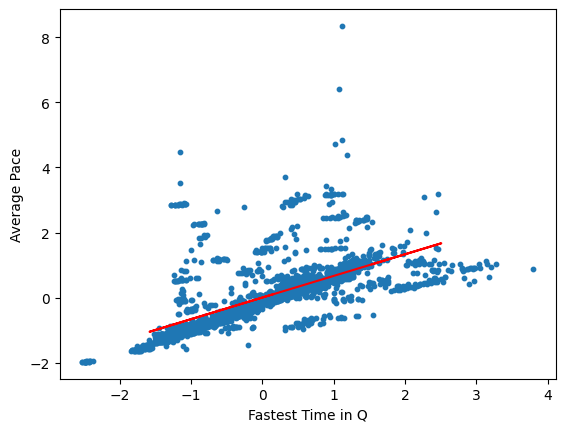

In [134]:
# predicted values

plt.scatter(X_train, y_train, s=10)
plt.xlabel('Fastest Time in Q')
plt.ylabel('Average Pace')
plt.plot(X_test, y_predict, color='r')
plt.show()

In [141]:
y_actual['predict'] = scaler.inverse_transform(y_predict)
y_actual.query('round == 7').sort_values('predict')

,season,round,grid,driver,podium,average_pace,qual_time,predict
2397,2021,7,1,max_verstappen,1,98.977,89.990,87.677273
2398,2021,7,2,hamilton,2,99.032,90.248,87.848885
2400,2021,7,3,bottas,4,99.253,90.376,87.934026
2399,2021,7,4,perez,3,99.143,90.445,87.979922
2406,2021,7,5,sainz,11,100.851,90.840,88.242662
2403,2021,7,6,gasly,7,100.422,90.868,88.261286
2410,2021,7,7,leclerc,16,101.282,90.987,88.340441
2401,2021,7,8,norris,5,100.185,91.252,88.516709
2404,2021,7,9,alonso,8,100.443,91.340,88.575243
2402,2021,7,10,ricciardo,6,100.408,91.382,88.603180


In [ ]:
# model evaluation
rmse = mean_squared_error(y_train, y_predict)
r2 = r2_score(y_train, y_predict)

In [ ]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Slope: [[0.66516332]]
Intercept: [-4.15563617e-16]
RMSE: 0.557557762869273
R2: 0.44244223713072695
